# Pytorch 影像辨識網路模型介紹 (基礎)

核心精神: 越深越好!!! 參數量&運算量越少越好!!!

1. LeNet 1998
2. AlexNet (ILSVRC2012)
3. ZFNet (ILSVRC2013)
4. NIN (Network in Network)
5. VGG (ILSVRC2014)
6. GoogleLeNet

### ILSVRC 影像辨識競賽 歷屆冠軍模型
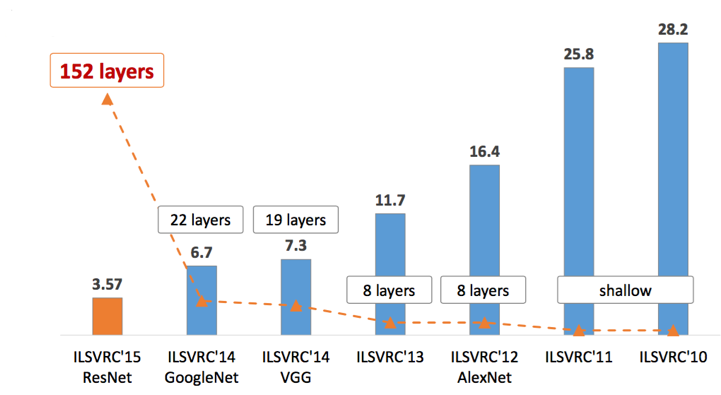




### 卷積神經網路計算公式 (超級重要)


#### 1. 卷積層

對於卷積層，輸出特徵圖的大小 \(W_{out}\), \(H_{out}\) 可以透過以下公式計算：

- $$W_{out} = \left\lfloor \frac{W_{in} - K + 2P}{S} \right\rfloor + 1$$
- $$H_{out} = \left\lfloor \frac{H_{in} - K + 2P}{S} \right\rfloor + 1$$

其中：

- \(K\) 是卷積核的大小（假設為正方形，所以寬度和高度相同）。
- \(P\) 是邊緣填充的數量（Padding）。
- \(S\) 是卷積的步長（Stride）。
- \(W_{in}\), \(H_{in}\) 是輸入特徵圖的寬度和高度。
- \(W_{out}\), \(H_{out}\) 是輸出特徵圖的寬度和高度。

#### 2. 池化層

對於池化層，公式與卷積層類似，但通常沒有填充（\(P=0\)），並且池化操作通常有一個固定的窗口大小 \(F\) 和步長 \(S\)。因此，輸出的大小 \(W_{out}\), \(H_{out}\) 可以透過以下公式計算：

- $$W_{out} = \left\lfloor \frac{W_{in} - F}{S} \right\rfloor + 1$$
- $$H_{out} = \left\lfloor \frac{H_{in} - F}{S} \right\rfloor + 1$$

其中：

- \(F\) 是池化窗口的大小。
- \(S\) 是池化的步長。
- \(W_{in}\), \(H_{in}\) 是輸入特徵圖的寬度和高度。
- \(W_{out}\), \(H_{out}\) 是輸出特徵圖的寬度和高度。




## LeNet - 5

LeNet 是 LeCun 在 1998 年提出的一種七層卷積網絡，專門用於數字分類，多家銀行使用它來識別支票上以 32x32 像素灰度輸入圖像數位化的手寫數字。處理更高解析度圖像的能力需要更大且更多的卷積層，因此這項技術受限於計算資源的可用性。

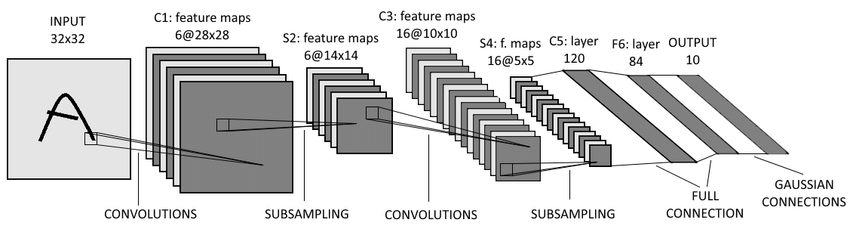


5 層的由來: 2 convolution layer + 3 fully-connected layer, maxpool 不算


In [12]:
import torch
from torch import nn
from torch.nn import functional as F

# components model
class LeNet5(nn.Module):
    def __init__(self):

        '''
            初始化建立元件

            #元件一
            torch.nn.Conv2d(in_channels, out_channels, kernel_size, 
            stride=1, padding=0, 
            dilation=1, groups=1, 
            bias=True, padding_mode='zeros')

            #元件二
            torch.nn.functional.max_pool2d(input, kernel_size, 
            stride=None, padding=0, 
            dilation=1, ceil_mode=False, return_indices=False)

        '''

        # super().__init__()
        super(LeNet5, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, 5) # conv1 (hidden layer 1)
        self.conv2 = nn.Conv2d(6, 16, 5) # conv2 (hidden layer 2)
        self.fc1 = nn.Linear(16*5*5, 120) # fully connection 1 (hidden layer 3)
        self.fc2 = nn.Linear(120, 84) # fully connection 2 (hidden layer 4)
        self.fc3 = nn.Linear(84, 10) # output layer

    def forward(self, x):
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
        x = F.max_pool2d(F.relu(self.conv2(x)), (2,2))
        x = torch.flatten(x, 1) # 非運算單元, 只針對記憶體位置做重新擺放
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)

        return x 



In [11]:
from torchsummary import summary
model = LeNet5()
summary(model, (1, 32, 32)) # input size (1, 32, 32)


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 6, 28, 28]             156
            Conv2d-2           [-1, 16, 10, 10]           2,416
            Linear-3                  [-1, 120]          48,120
            Linear-4                   [-1, 84]          10,164
            Linear-5                   [-1, 10]             850
Total params: 61,706
Trainable params: 61,706
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.05
Params size (MB): 0.24
Estimated Total Size (MB): 0.29
----------------------------------------------------------------


## AlexNet

AlexNet 被視為第一篇真正引起對卷積神經網絡(CNN)興趣的論文/模型，因為它在 2012 年的 ImageNet 挑戰賽中勝出。AlexNet 是一個深度卷積神經網絡，訓練於 ImageNet 數據集上，並且在當年超越了所有其他參賽作品。它帶來了重大的進步，與次佳參賽作品相比，後者的前 5 名測試錯誤率僅為 26.2%。與現代架構相比，這篇論文使用了相對簡單的布局。



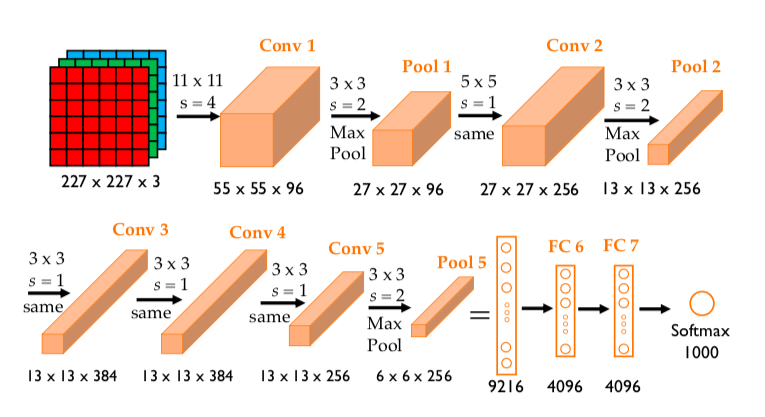


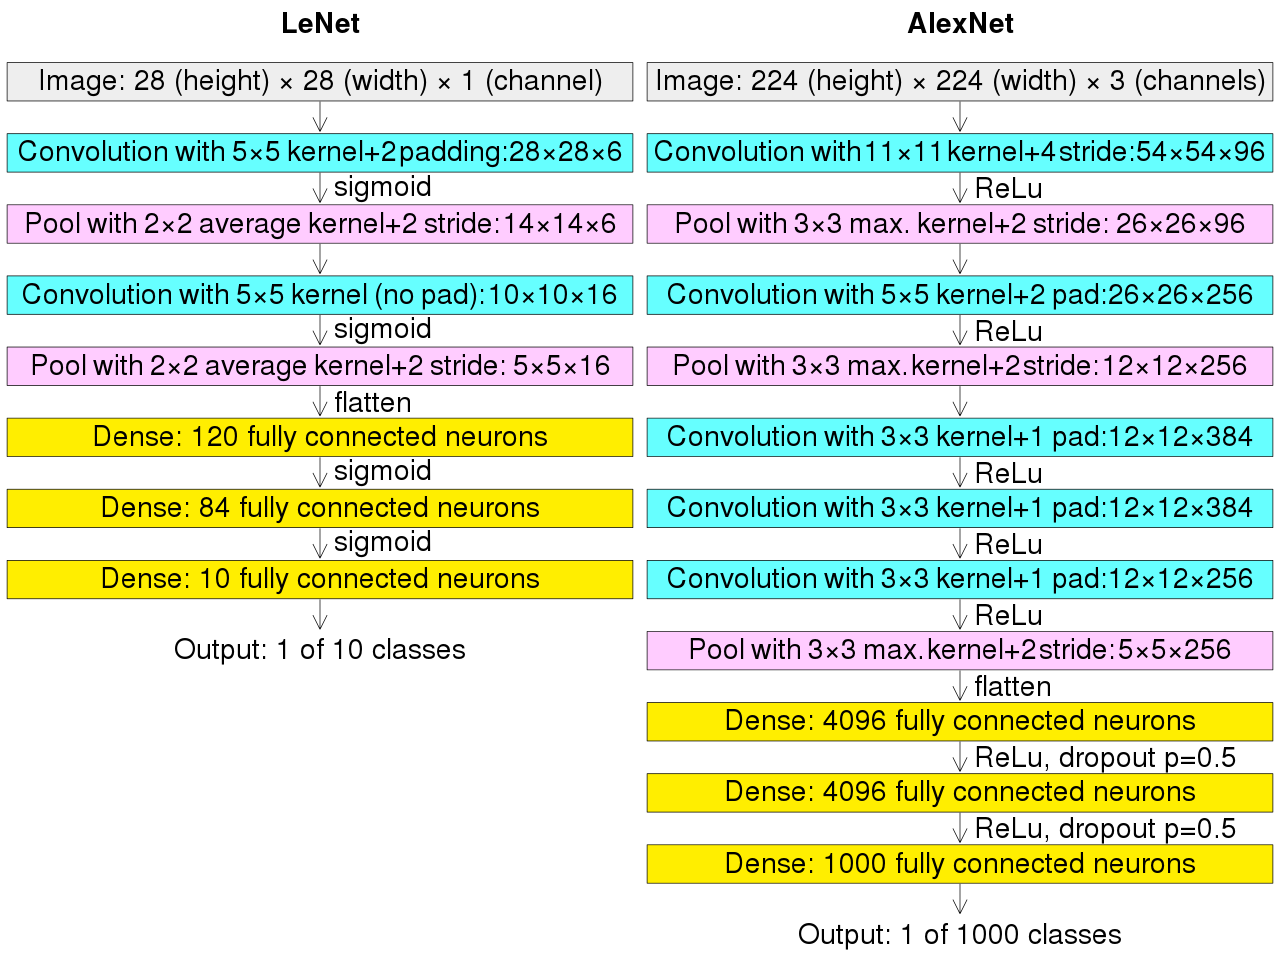


- 5 convolution layer + 3 fully-connected layer
- activation function 使用 rectified linear units (ReLU) 加速收斂

In [3]:
# Sequential model
class AlexNet(nn.Module):
    def __init__(self, num_classes=1000):
        super(AlexNet, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 96, kernel_size=11, stride=4, padding=2),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2),
            nn.Conv2d(96, 256, kernel_size=5, padding=2),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2),
            nn.Conv2d(256, 384, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(384, 384, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(384, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2),
        )

        self.avgpool = nn.AdaptiveAvgPool2d((6, 6))

        self.classifier = nn.Sequential(
            nn.Dropout(),
            nn.Linear(256 * 6 * 6, 4096),
            nn.ReLU(inplace=True),
            nn.Dropout(),
            nn.Linear(4096, 4096),
            nn.ReLU(inplace=True),
            nn.Linear(4096, num_classes),
        ) 
    
    def forward(self, x):
        x = self.features(x)
        x = self.avgpool(x)
        x = torch.flatten(x, 1) # 非運算單元, 只針對記憶體位置做重新擺放
        x = self.classifier(x)
        return x    



In [5]:
from torchsummary import summary
model = AlexNet(num_classes=1000)
summary(model, (3, 224, 224))  # 假設輸入圖像大小是 224x224x3


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 96, 55, 55]          34,944
              ReLU-2           [-1, 96, 55, 55]               0
         MaxPool2d-3           [-1, 96, 27, 27]               0
            Conv2d-4          [-1, 256, 27, 27]         614,656
              ReLU-5          [-1, 256, 27, 27]               0
         MaxPool2d-6          [-1, 256, 13, 13]               0
            Conv2d-7          [-1, 384, 13, 13]         885,120
              ReLU-8          [-1, 384, 13, 13]               0
            Conv2d-9          [-1, 384, 13, 13]       1,327,488
             ReLU-10          [-1, 384, 13, 13]               0
           Conv2d-11          [-1, 256, 13, 13]         884,992
             ReLU-12          [-1, 256, 13, 13]               0
        MaxPool2d-13            [-1, 256, 6, 6]               0
AdaptiveAvgPool2d-14            [-1, 25

## ZFNet (ILSVRC2013)

ZFNet 是 AlexNet 的一個改進版本，提供了更好的準確性。且是第一個使用反卷積可視化方式解釋模型

兩者方法的一個主要區別是 ZFNet 使用了 7x7 尺寸的過濾器，而 AlexNet 使用了 11x11 尺寸的過濾器。這樣做的直覺理由是，使用較大的過濾器會導致失去許多像素信息，而在較早的卷積層使用較小尺寸的過濾器可以保留這些信息。隨著網絡加深，過濾器的數量增加。這個網絡也使用了 ReLUs 作為激活函數，並採用批量隨機梯度下降法進行訓練。

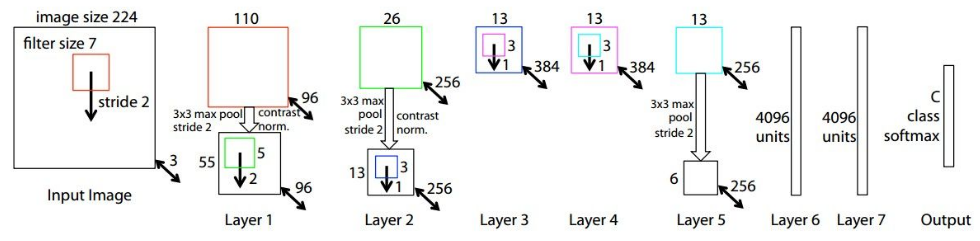

### Class Activation Mapping
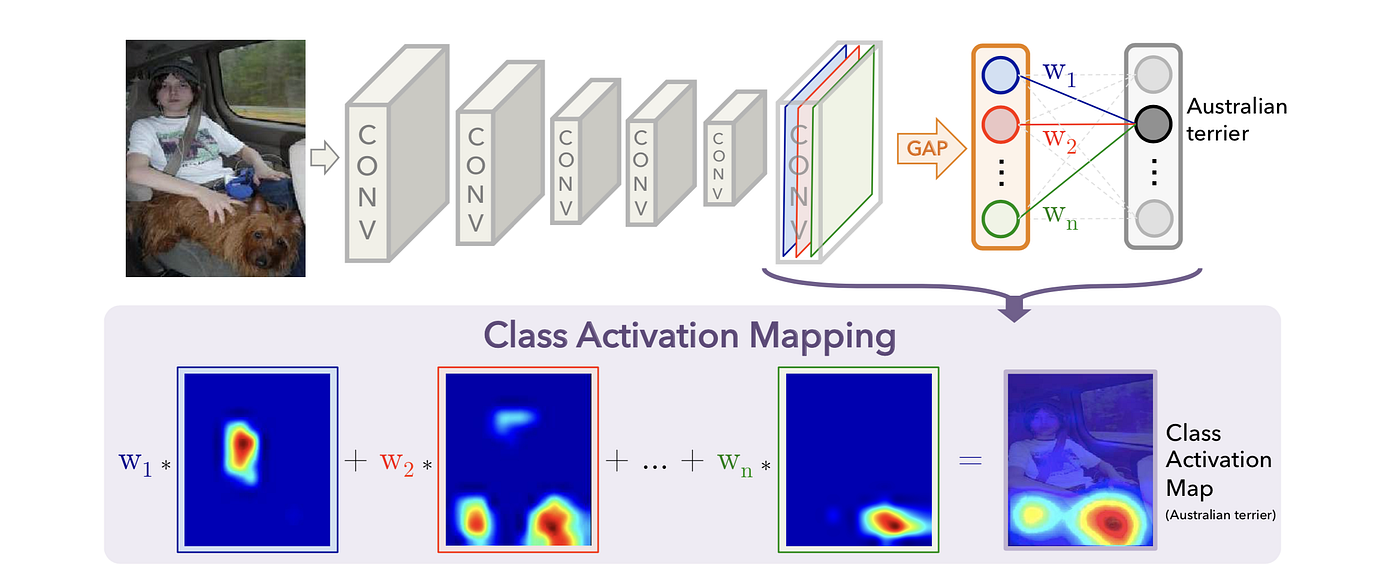



## NIN (Network in Network)
NIN 的主要創新之處在於它提出了一種新的概念，即「mlpconv」層，這實際上是一個小型多層感知機（MLP），它作用在每一個像素點上。這個小型網絡可以捕捉到局部區域內更細緻的抽象特徵，並且透過多層結構增加了模型的非線性表達能力，這對於複雜圖像分類問題特別有用。
[參考](https://allenlu2007.wordpress.com/2019/01/06/1x1-and-network-in-network-nin-%E6%9C%89%E4%BB%80%E9%BA%BC%E7%94%A8/)

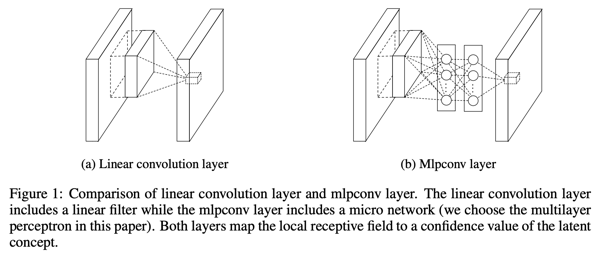

- 提出 Linear Conv (1*1 Conv) -> 模型壓縮(降維)
- 提出 Global Average pooling
- 利用 Linear Conv + Global Average pooling 取代傳統卷積

### 3×3 kernel vs 1×1 kernel (Linear Conv)
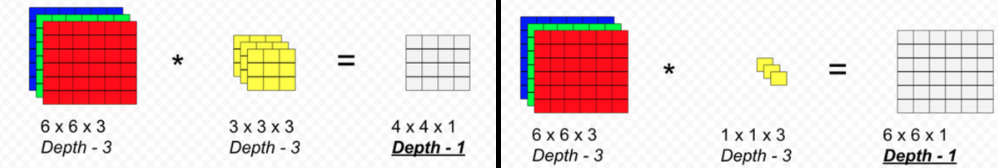


### Global Average pooling

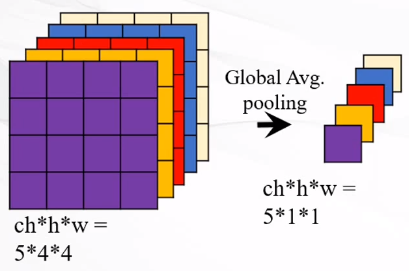

----


## VGG16 (ILSVRC2014)

VGG 名稱來自於 Visual Geometry Group (University of Oxford)
aka. very deep convolutional network for large-scale image recongition


VGG的概念在2013年被提交，並在2014年的ImageNet比賽中獲得亞軍。與AlexNet和ZFNet相比，它被廣泛使用為一種更為簡單的架構。
VGG網絡相比於AlexNet的11x11過濾器和ZFNet的7x7過濾器，使用了3x3的過濾器。作者提出這樣做的直覺是，兩個連續的3x3過濾器具有相當於5x5的有效接收域，而3個3x3過濾器則提供了相當於7x7過濾器的接收域，但使用這種方式可以大幅減少網絡中需要訓練的超參數數量。


### Receptive Field
在深度學習的影像辨識領域中，網路越深越好，一個 5X5 卷積等價於一個 3X3 卷積

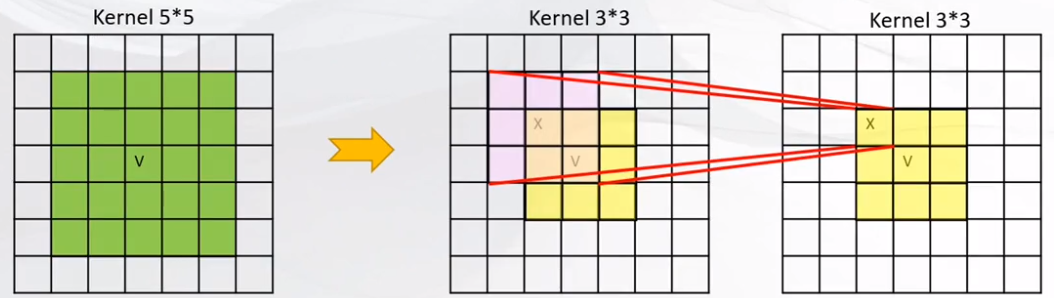

### AlexNet vs VGGnet
大方向(重要): 
- kernel size 5x5 換成 3x3, 
- size * 0.5, filter * 2
- 2 conv + 1 pooling = 1 block

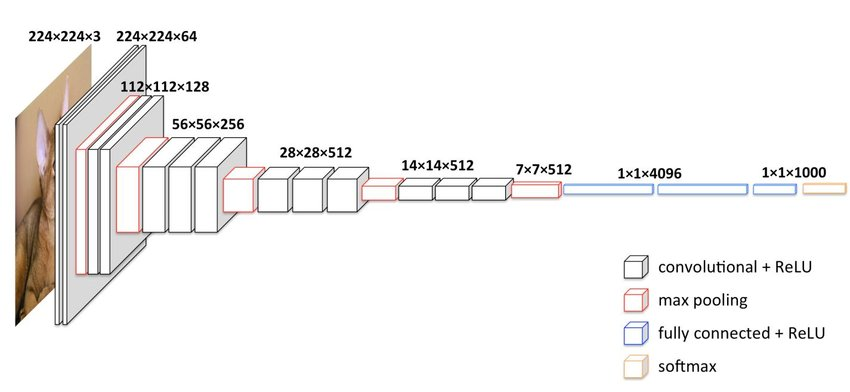

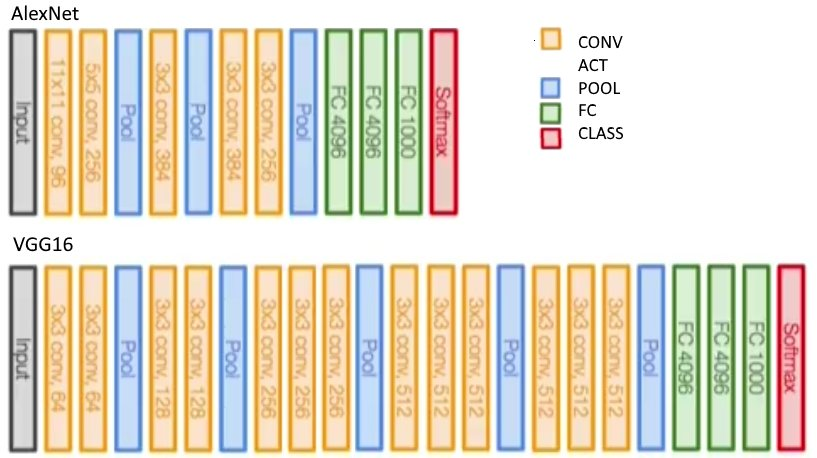

In [13]:
import torch
import torch.nn as nn


class VGG(nn.Module):
    def __init__(self, num_classes=1000):
        super(VGG, self).__init__()
        self.features = nn.Sequential(
            # Conv Block 1 => 5 layers
            nn.Conv2d(3, 64, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(64, 64, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            
            # Conv Block 2 => 5 layers
            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(128, 128, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            
            # Conv Block 3 => 7 layers
            nn.Conv2d(128, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(256, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(256, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            
            # Conv Block 4 => 7 layers
            nn.Conv2d(256, 512, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(512, 512, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(512, 512, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            
            # Conv Block 5 => 7 layers
            nn.Conv2d(512, 512, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(512, 512, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(512, 512, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
        )

        self.avgpool = nn.AdaptiveAvgPool2d((7, 7))

        self.classifier = nn.Sequential(
            nn.Linear(512 * 7 * 7, 4096),
            nn.ReLU(inplace=True),
            nn.Dropout(),
            nn.Linear(4096, 4096),
            nn.ReLU(inplace=True),
            nn.Dropout(),
            nn.Linear(4096, num_classes),
        )
    
    def forward(self, x):
        x = self.features(x)
        x = self.avgpool(x)
        x = torch.flatten(x, 1)
        x = self.classifier(x)
        return x

# Example of creating a VGG16 model
model = VGG(num_classes=1000)
print(model)



VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [15]:
from torchsummary import summary
model = VGG(num_classes=1000)
summary(model, (3, 224, 224))  # 假設輸入圖像大小是 224x224x3



----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 224, 224]           1,792
              ReLU-2         [-1, 64, 224, 224]               0
            Conv2d-3         [-1, 64, 224, 224]          36,928
              ReLU-4         [-1, 64, 224, 224]               0
         MaxPool2d-5         [-1, 64, 112, 112]               0
            Conv2d-6        [-1, 128, 112, 112]          73,856
              ReLU-7        [-1, 128, 112, 112]               0
            Conv2d-8        [-1, 128, 112, 112]         147,584
              ReLU-9        [-1, 128, 112, 112]               0
        MaxPool2d-10          [-1, 128, 56, 56]               0
           Conv2d-11          [-1, 256, 56, 56]         295,168
             ReLU-12          [-1, 256, 56, 56]               0
           Conv2d-13          [-1, 256, 56, 56]         590,080
             ReLU-14          [-1, 256,

## GoogleLeNet (Inception V1)

在2014年，雖然開發了像VGG這樣的優秀模型，但ImageNet競賽的勝出者是GoogLeNet。
GoogLeNet 提出了一種名為「Inception模塊」的結構，其中包含了網絡中的跳躍連接，形成一個迷你模塊，並在整個網絡中重複使用這個模塊。
GoogLeNet 使用了9個Inception模塊，並且通過使用平均池化層從7x7x1024減少到1x1x1024，從而消除了所有全連接層。這樣做節省了大量的參數。

其網路參數量只有AlexNet 的1/12，但隨著網路層數加深，梯度消失的問題依然存在

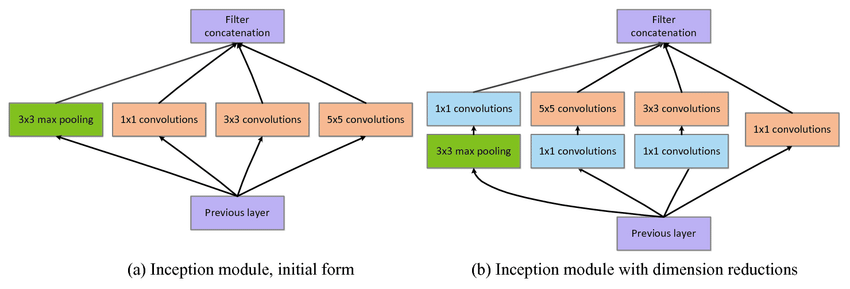

### 並聯模組搭配權重學習
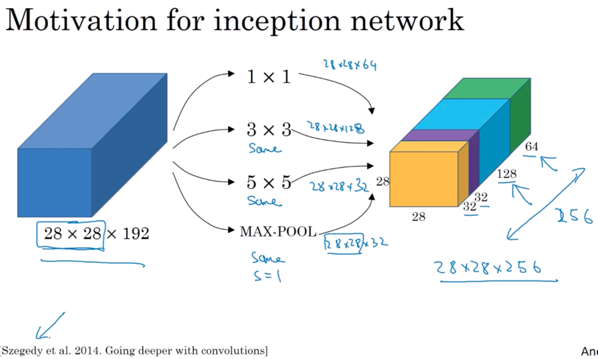

### googleNet 參數架構
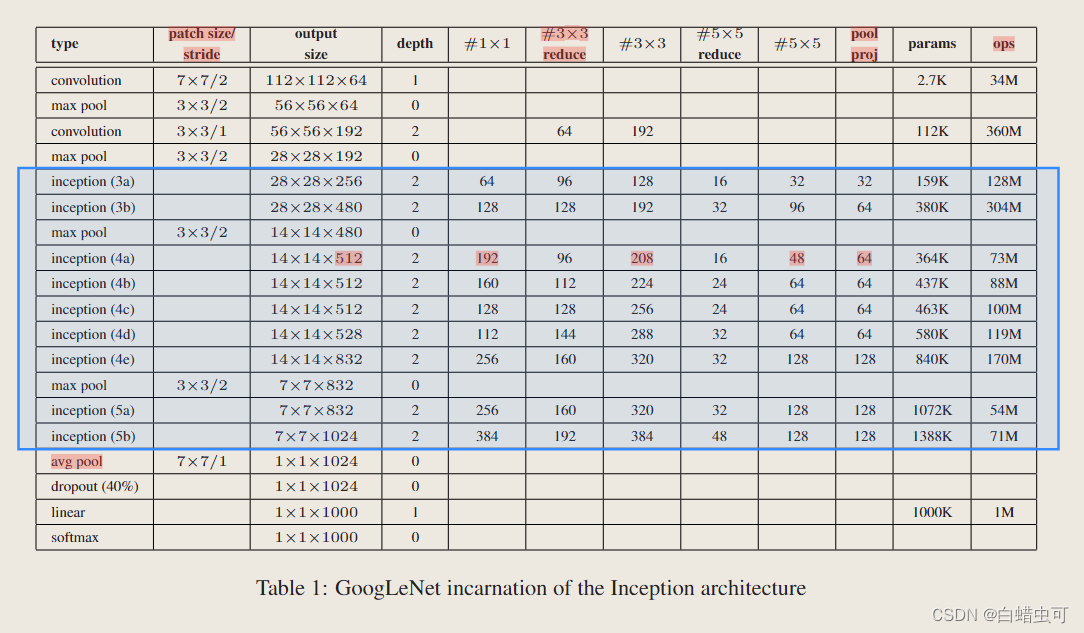
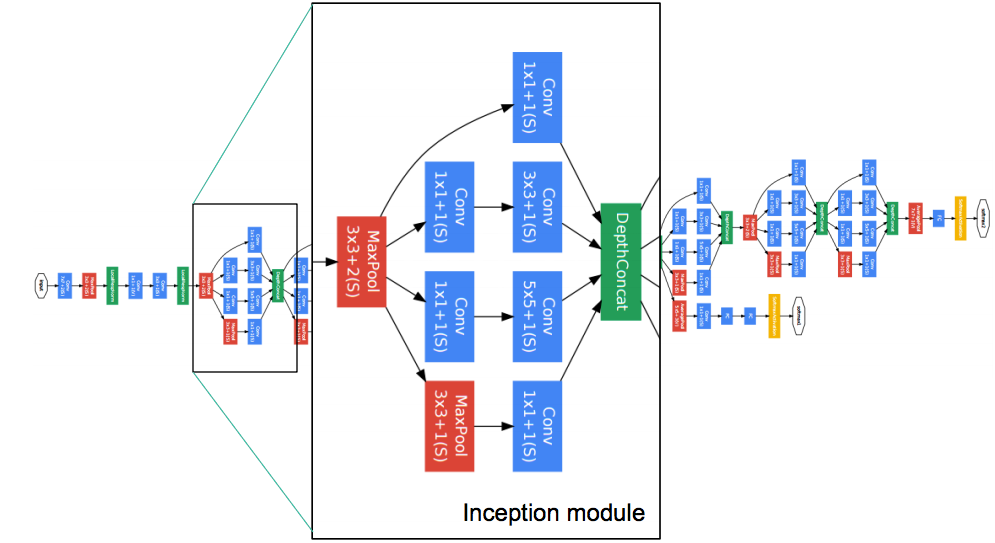

In [33]:
import torch
import torch.nn as nn

class InceptionModule(nn.Module):

    '''
    ch3x3red 用來指代在進行3x3卷積操作之前進行的縮減（reduction）層的通道（channel）數。
    這個縮減層通常是一個1x1的卷積層，其目的是減少在執行更大卷積核操作前的特徵圖的維度，從而降低計算複雜度和參數數量

    具體來說，ch3x3red表示進行3x3卷積之前，用於縮減特徵圖維度的1x1卷積層的輸出通道數。
    例如，如果ch3x3red設置為96，則意味著1x1卷積層將輸入特徵圖的通道數縮減（或轉換）到96個通道，然後這96個通道的輸出將被用作隨後的3x3卷積操作的輸入。

    '''

    def __init__(self, in_channels, ch1x1, ch3x3red, ch3x3, ch5x5red, ch5x5, pool_proj):

        super(InceptionModule, self).__init__()

        self.branch1 = nn.Sequential(
            nn.Conv2d(in_channels, ch1x1, kernel_size=1), # 透過 1*1 卷積 控制 ch1x1 輸出通道數
            nn.ReLU(inplace=True),
        )
        
        self.branch2 = nn.Sequential(
            nn.Conv2d(in_channels, ch3x3red, kernel_size=1), # 透過 1*1 卷積 控制 ch3x3red 輸出通道數
            nn.ReLU(inplace=True),
            nn.Conv2d(ch3x3red, ch3x3, kernel_size=3, padding=1), 
            nn.ReLU(inplace=True),
        )
        
        self.branch3 = nn.Sequential(
            nn.Conv2d(in_channels, ch5x5red, kernel_size=1), # 透過 1*1 卷積 控制 ch5x5red 輸出通道數
            nn.ReLU(inplace=True),
            nn.Conv2d(ch5x5red, ch5x5, kernel_size=5, padding=2),
            nn.ReLU(inplace=True),
        )
        
        self.branch4 = nn.Sequential(
            nn.MaxPool2d(kernel_size=3, stride=1, padding=1),
            nn.Conv2d(in_channels, pool_proj, kernel_size=1), # 透過 1*1 卷積 控制 pool_proj 輸出通道數
            nn.ReLU(inplace=True),
        )
        
    def forward(self, x):
        branch1 = self.branch1(x)
        branch2 = self.branch2(x)
        branch3 = self.branch3(x)
        branch4 = self.branch4(x)
        outputs = [branch1, branch2, branch3, branch4]
        return torch.cat(outputs, 1)

class GoogLeNet(nn.Module):
    def __init__(self, num_classes=1000):
        super(GoogLeNet, self).__init__()
        
        self.pre_layers = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=7, stride=2, padding=3),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2, padding=1),
            nn.Conv2d(64, 64, kernel_size=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(64, 192, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2, padding=1),
        )
        
        self.inception3a = InceptionModule(192, 64, 96, 128, 16, 32, 32)
        self.inception3b = InceptionModule(256, 128, 128, 192, 32, 96, 64)
        self.maxpool = nn.MaxPool2d(kernel_size=3, stride=2, padding=1)
        
        # More Inception modules would follow in the actual implementation
        self.avgpool = nn.AdaptiveAvgPool2d((1, 1))
        self.dropout = nn.Dropout(0.4)
        self.fc = nn.Linear(480, num_classes)
        
    def forward(self, x):
        x = self.pre_layers(x)
        x = self.inception3a(x)
        x = self.inception3b(x)
        x = self.maxpool(x)
        # Additional Inception modules would be applied here
        x = self.avgpool(x)
        x = torch.flatten(x, 1)
        x = self.dropout(x)
        x = self.fc(x)
        return x


In [32]:
from torchsummary import summary
model = GoogLeNet(num_classes=1000)
summary(model, (3, 224, 224))  # 假設輸入圖像大小是 224x224x3


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 112, 112]           9,472
              ReLU-2         [-1, 64, 112, 112]               0
         MaxPool2d-3           [-1, 64, 56, 56]               0
            Conv2d-4           [-1, 64, 56, 56]           4,160
              ReLU-5           [-1, 64, 56, 56]               0
            Conv2d-6          [-1, 192, 56, 56]         110,784
              ReLU-7          [-1, 192, 56, 56]               0
         MaxPool2d-8          [-1, 192, 28, 28]               0
            Conv2d-9           [-1, 64, 28, 28]          12,352
             ReLU-10           [-1, 64, 28, 28]               0
           Conv2d-11           [-1, 96, 28, 28]          18,528
             ReLU-12           [-1, 96, 28, 28]               0
           Conv2d-13          [-1, 128, 28, 28]         110,720
             ReLU-14          [-1, 128,